# Optogenetic Model Evaluation

In [26]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = "Futura Bk"
# for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist])):
#     print(font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Light Model

### 3D graphic
First we'll compare the model to the figure from Foutz et al. 2012.
![Foutz et al. 2012 Figure 2A](foutz12_2a.jpg)


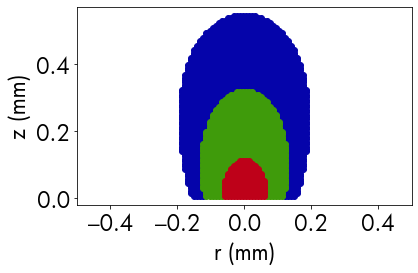

In [27]:
from matplotlib import colors
from brian2 import mm
import brian2.units.unitsafefunctions as usf

from clocsim.stimulators.opto import *
opto = OptogeneticIntervention(name='opto', opsin_model=four_state, 
        opsin_params=ChR2_four_state, light_model_params=default_blue)

x = np.linspace(-0.9, 0.9, 200)
y = np.linspace(-0.2, 2, 300)
x, y = np.meshgrid(x, y)
dir_uvec = np.array([[0], [1]])

coords = np.vstack([x.flatten(), y.flatten()]).T
coords = coords*mm
z = usf.dot(coords, dir_uvec)  # distance along cylinder axis
r = np.sqrt( np.sum( (coords-usf.dot(z, dir_uvec.T))**2, axis=1 ) )
r = r.reshape((-1, 1))

T = opto._Foutz12_transmittance(r, z)
# T[-100:, 0] = 0.004

# filter out points with <0.001 transmittance to make plotting faster
blue_T = 0.001
idx_to_plot = T[:,0] >= blue_T
x = x.flatten()[idx_to_plot]; y = y.flatten()[idx_to_plot]
T = T[idx_to_plot, 0]
def plot_interval(start, stop, color):
    idxs = (T >= start) & (T < stop)
    plt.scatter(x[idxs], y[idxs], c=color, marker='o')
plot_interval(.001, .01, 'xkcd:royal blue')
plot_interval(.01, .1, 'xkcd:grass green')
plot_interval(.1, 1, 'xkcd:scarlet')

plt.gca().set_aspect('equal')
plt.xlabel('r (mm)')
plt.ylabel('z (mm)')
plt.xlim(-.5, .5)
plt.show()

### Transmission-distance plot
Next we'll try to replicate figure 2B from Foutz et al. 2012. The x-axis represents distance from light to the cell body, ranging from 0 to 2 mm. Each line is for optic fibers of different radii.

![Foutz et al. 2012 Figure 2B](foutz12_2b.jpg)

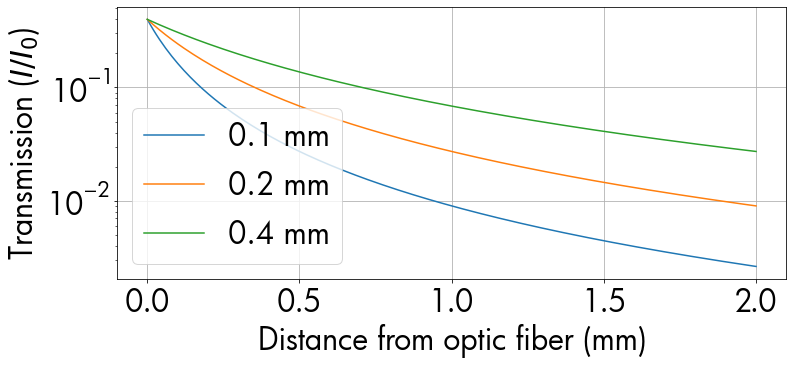

In [39]:
plt.figure(figsize=(12,5))
z = np.linspace(0, 2, 200)*mm
opto.light_model_params['R0'] = 0.05*mm
T1 = opto._Foutz12_transmittance(np.zeros_like(z), z)
opto.light_model_params['R0'] = 0.2*mm
T4 = opto._Foutz12_transmittance(np.zeros_like(z), z)
opto.light_model_params['R0'] = 0.1*mm
T2 = opto._Foutz12_transmittance(np.zeros_like(z), z)
plt.plot(z/mm, T1, label='0.1 mm')
plt.plot(z/mm, T2, label='0.2 mm')
plt.plot(z/mm, T4, label='0.4 mm')
plt.yscale('log')
plt.ylabel('Transmission ($I/I_0$)')
plt.xlabel('Distance from optic fiber (mm)')
plt.legend()
plt.grid(True)
# plt.ylim(1e-4, 1)
matplotlib.rc('font', size=30)
plt.show()